In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv("BTC-Hourly.csv", parse_dates=["date"], index_col="date").iloc[::-1]  # Iloc = reverse so the first is the oldest
data

,unix,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,,
2018-05-15 06:00:00,1526364000,BTC/USD,8733.86,8796.68,8707.28,8740.99,4.906603e+06,5.599300e+02
2018-05-15 07:00:00,1526367600,BTC/USD,8740.99,8766.00,8721.11,8739.00,2.390399e+06,2.735800e+02
2018-05-15 08:00:00,1526371200,BTC/USD,8739.00,8750.27,8660.53,8728.49,7.986063e+06,9.177900e+02
2018-05-15 09:00:00,1526374800,BTC/USD,8728.49,8754.40,8701.35,8708.32,1.593992e+06,1.826200e+02
2018-05-15 10:00:00,1526378400,BTC/USD,8708.32,8865.00,8695.11,8795.90,1.110127e+07,1.260690e+03
...,...,...,...,...,...,...,...,...
2022-02-28 20:00:00,1646078400,BTC/USD,41361.99,41971.00,41284.11,41914.97,2.471517e+02,1.035935e+07
2022-02-28 21:00:00,1646082000,BTC/USD,41917.09,41917.09,41542.60,41659.53,6.975168e+01,2.905822e+06
2022-02-28 22:00:00,1646085600,BTC/USD,41657.23,44256.08,41650.29,42907.32,5.275406e+02,2.263535e+07


In [7]:
data = data[["close", "Volume USD"]].copy()
data.columns = ["Close", "Volume"]
data

,Close,Volume
date,,
2018-05-15 06:00:00,8740.99,5.599300e+02
2018-05-15 07:00:00,8739.00,2.735800e+02
2018-05-15 08:00:00,8728.49,9.177900e+02
2018-05-15 09:00:00,8708.32,1.826200e+02
2018-05-15 10:00:00,8795.90,1.260690e+03
...,...,...
2022-02-28 20:00:00,41914.97,1.035935e+07
2022-02-28 21:00:00,41659.53,2.905822e+06
2022-02-28 22:00:00,42907.32,2.263535e+07


In [8]:
data["returns"] = np.log(data.Close.div(data.Close.shift(1)))
data

,Close,Volume,returns
date,,,
2018-05-15 06:00:00,8740.99,5.599300e+02,NaN
2018-05-15 07:00:00,8739.00,2.735800e+02,-0.000228
2018-05-15 08:00:00,8728.49,9.177900e+02,-0.001203
2018-05-15 09:00:00,8708.32,1.826200e+02,-0.002313
2018-05-15 10:00:00,8795.90,1.260690e+03,0.010007
...,...,...,...
2022-02-28 20:00:00,41914.97,1.035935e+07,0.013268
2022-02-28 21:00:00,41659.53,2.905822e+06,-0.006113
2022-02-28 22:00:00,42907.32,2.263535e+07,0.029512


In [16]:
data["Close"].iloc[-1]

43312.27

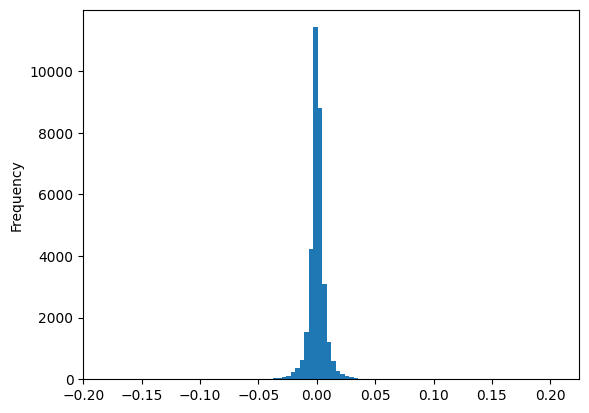

In [32]:
data.returns.plot(kind="hist", bins=100)
plt.show()

In [45]:
data["cretruns"] = data.returns.cumsum().apply(np.exp)
data

,Close,Volume,returns,cretruns
date,,,,
2018-05-15 06:00:00,8740.99,5.599300e+02,NaN,NaN
2018-05-15 07:00:00,8739.00,2.735800e+02,-0.000228,0.999772
2018-05-15 08:00:00,8728.49,9.177900e+02,-0.001203,0.998570
2018-05-15 09:00:00,8708.32,1.826200e+02,-0.002313,0.996262
2018-05-15 10:00:00,8795.90,1.260690e+03,0.010007,1.006282
...,...,...,...,...
2022-02-28 20:00:00,41914.97,1.035935e+07,0.013268,4.795220
2022-02-28 21:00:00,41659.53,2.905822e+06,-0.006113,4.765997
2022-02-28 22:00:00,42907.32,2.263535e+07,0.029512,4.908748


In [61]:
data["vol_ch"] =  np.log(data.Volume.div(data.Volume.shift(1)))
data

C:\Users\sasso\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Close,Volume,returns,cretruns,vol_ch
date,,,,,
2018-05-15 06:00:00,8740.99,5.599300e+02,NaN,NaN,NaN
2018-05-15 07:00:00,8739.00,2.735800e+02,-0.000228,0.999772,-0.716218
2018-05-15 08:00:00,8728.49,9.177900e+02,-0.001203,0.998570,1.210375
2018-05-15 09:00:00,8708.32,1.826200e+02,-0.002313,0.996262,-1.614561
2018-05-15 10:00:00,8795.90,1.260690e+03,0.010007,1.006282,1.932007
...,...,...,...,...,...
2022-02-28 20:00:00,41914.97,1.035935e+07,0.013268,4.795220,0.784715
2022-02-28 21:00:00,41659.53,2.905822e+06,-0.006113,4.765997,-1.271174
2022-02-28 22:00:00,42907.32,2.263535e+07,0.029512,4.908748,2.052797


In [62]:
data.loc[data.vol_ch > 5, "vol_ch"] = np.nan
data.loc[data.vol_ch < -5, "vol_ch"] = np.nan
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33259 entries, 2018-05-15 06:00:00 to 2022-03-01 00:00:00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     33259 non-null  float64
 1   Volume    33259 non-null  float64
 2   returns   33258 non-null  float64
 3   cretruns  33258 non-null  float64
 4   vol_ch    33243 non-null  float64
dtypes: float64(5)
memory usage: 2.5 MB


In [63]:
data

,Close,Volume,returns,cretruns,vol_ch
date,,,,,
2018-05-15 06:00:00,8740.99,5.599300e+02,NaN,NaN,NaN
2018-05-15 07:00:00,8739.00,2.735800e+02,-0.000228,0.999772,-0.716218
2018-05-15 08:00:00,8728.49,9.177900e+02,-0.001203,0.998570,1.210375
2018-05-15 09:00:00,8708.32,1.826200e+02,-0.002313,0.996262,-1.614561
2018-05-15 10:00:00,8795.90,1.260690e+03,0.010007,1.006282,1.932007
...,...,...,...,...,...
2022-02-28 20:00:00,41914.97,1.035935e+07,0.013268,4.795220,0.784715
2022-02-28 21:00:00,41659.53,2.905822e+06,-0.006113,4.765997,-1.271174
2022-02-28 22:00:00,42907.32,2.263535e+07,0.029512,4.908748,2.052797


In [65]:
data["ret_cat"] = pd.qcut(data.returns, q=10, labels=[-5, -4, -3, -2, -1, 1, 2, 3, 4, 5])
data["vol_cat"] = pd.qcut(data.vol_ch, q=10, labels=[-5, -4, -3, -2, -1, 1, 2, 3, 4, 5])
data

,Close,Volume,returns,cretruns,vol_ch,ret_cat,vol_cat
date,,,,,,,
2018-05-15 06:00:00,8740.99,5.599300e+02,NaN,NaN,NaN,NaN,NaN
2018-05-15 07:00:00,8739.00,2.735800e+02,-0.000228,0.999772,-0.716218,-1,-4
2018-05-15 08:00:00,8728.49,9.177900e+02,-0.001203,0.998570,1.210375,-2,5
2018-05-15 09:00:00,8708.32,1.826200e+02,-0.002313,0.996262,-1.614561,-3,-5
2018-05-15 10:00:00,8795.90,1.260690e+03,0.010007,1.006282,1.932007,5,5
...,...,...,...,...,...,...,...
2022-02-28 20:00:00,41914.97,1.035935e+07,0.013268,4.795220,0.784715,5,4
2022-02-28 21:00:00,41659.53,2.905822e+06,-0.006113,4.765997,-1.271174,-4,-5
2022-02-28 22:00:00,42907.32,2.263535e+07,0.029512,4.908748,2.052797,5,5


In [76]:
matrix = pd.crosstab(data.vol_cat, data.ret_cat)
matrix

ret_cat,-5,-4,-3,-2,-1,1,2,3,4,5
vol_cat,,,,,,,,,,
-5,99,273,366,423,439,430,449,371,326,149
-4,182,339,344,360,375,425,395,370,335,199
-3,205,283,373,363,388,389,368,372,332,251
-2,244,347,367,351,341,360,388,346,311,269
-1,239,341,318,395,361,350,335,362,333,291
1,303,322,332,352,360,343,332,336,354,290
2,349,351,330,320,307,321,309,330,384,323
3,389,337,354,292,323,292,292,323,333,389
4,515,394,303,280,236,255,249,283,326,483


In [78]:
import seaborn as sns

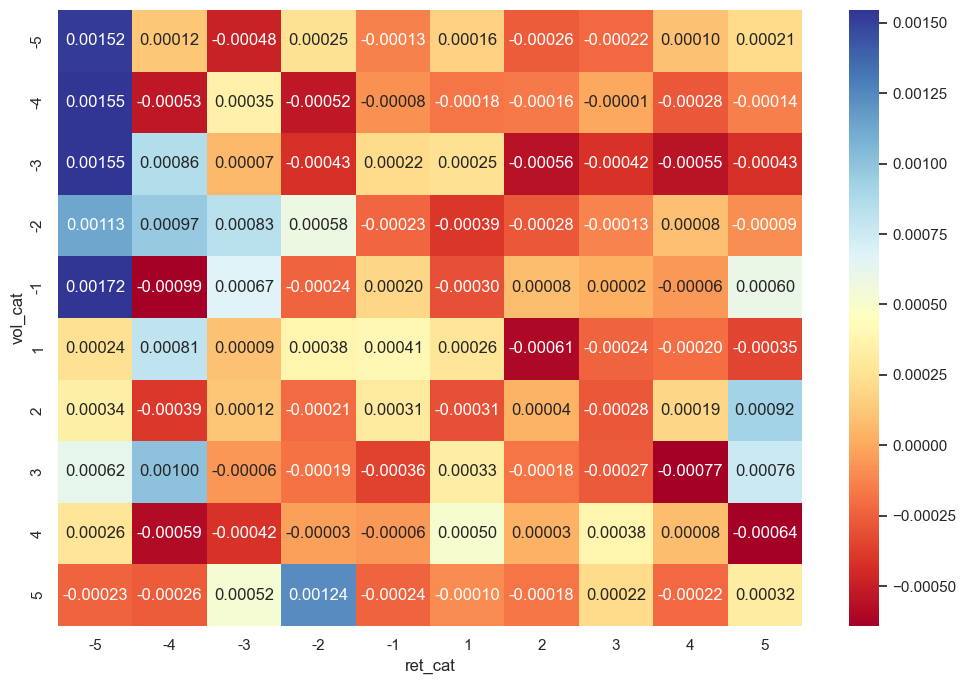

In [93]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1)
sns.heatmap(matrix, cmap="RdYlBu", annot=True, robust=True, fmt=".5f")
plt.show()

In [88]:
matrix = pd.crosstab(data.vol_cat.shift(), data.ret_cat.shift(), values=data.returns, aggfunc=np.mean)

In [129]:
data["position"] = 1

In [115]:
return_thresh1 = np.percentile(data.returns.dropna(), 90)
return_thresh2 = np.percentile(data.returns.dropna(), 10)
return_thresh1, return_thresh2

(0.006970364504234312, -0.0067789971823848175)

In [116]:
volume_thresh1 = np.percentile(data.vol_ch.dropna(), [5, 30])
volume_thresh2 = np.percentile(data.vol_ch.dropna(), 50)
volume_thresh1, volume_thresh2

(array([-1.17941196, -0.37762481]), -0.03172325670019281)

In [122]:
cond1 = data.returns >= return_thresh1
cond2 = data.vol_ch.between(volume_thresh1[0], volume_thresh1[1])

In [123]:
cond3 = data.returns < return_thresh2
cond4 = data.vol_ch < volume_thresh2

In [130]:
data.loc[cond1 & cond2, "position"] = 0
data.loc[cond2 & cond3, "position"] = 2
data.position.value_counts()

1    32265
0      545
2      449
Name: position, dtype: int64

In [131]:
data["strategy"] = data.position.shift(1) * data["returns"]
data

,Close,Volume,returns,cretruns,vol_ch,ret_cat,vol_cat,position,strategy,cstrategy
date,,,,,,,,,,
2018-05-15 06:00:00,8740.99,5.599300e+02,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
2018-05-15 07:00:00,8739.00,2.735800e+02,-0.000228,0.999772,-0.716218,-1,-4,1,-0.000228,0.999772
2018-05-15 08:00:00,8728.49,9.177900e+02,-0.001203,0.998570,1.210375,-2,5,1,-0.001203,0.998570
2018-05-15 09:00:00,8708.32,1.826200e+02,-0.002313,0.996262,-1.614561,-3,-5,1,-0.002313,0.996262
2018-05-15 10:00:00,8795.90,1.260690e+03,0.010007,1.006282,1.932007,5,5,1,0.010007,1.006282
...,...,...,...,...,...,...,...,...,...,...
2022-02-28 20:00:00,41914.97,1.035935e+07,0.013268,4.795220,0.784715,5,4,1,0.013268,5.461235
2022-02-28 21:00:00,41659.53,2.905822e+06,-0.006113,4.765997,-1.271174,-4,-5,1,-0.006113,5.427953
2022-02-28 22:00:00,42907.32,2.263535e+07,0.029512,4.908748,2.052797,5,5,1,0.029512,5.590531


In [132]:
data[["returns", "strategy"]].sum().apply(np.exp)

returns      4.955076
strategy    11.636686
dtype: float64

In [133]:
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
data

,Close,Volume,returns,cretruns,vol_ch,ret_cat,vol_cat,position,strategy,cstrategy
date,,,,,,,,,,
2018-05-15 06:00:00,8740.99,5.599300e+02,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
2018-05-15 07:00:00,8739.00,2.735800e+02,-0.000228,0.999772,-0.716218,-1,-4,1,-0.000228,0.999772
2018-05-15 08:00:00,8728.49,9.177900e+02,-0.001203,0.998570,1.210375,-2,5,1,-0.001203,0.998570
2018-05-15 09:00:00,8708.32,1.826200e+02,-0.002313,0.996262,-1.614561,-3,-5,1,-0.002313,0.996262
2018-05-15 10:00:00,8795.90,1.260690e+03,0.010007,1.006282,1.932007,5,5,1,0.010007,1.006282
...,...,...,...,...,...,...,...,...,...,...
2022-02-28 20:00:00,41914.97,1.035935e+07,0.013268,4.795220,0.784715,5,4,1,0.013268,11.261274
2022-02-28 21:00:00,41659.53,2.905822e+06,-0.006113,4.765997,-1.271174,-4,-5,1,-0.006113,11.192645
2022-02-28 22:00:00,42907.32,2.263535e+07,0.029512,4.908748,2.052797,5,5,1,0.029512,11.527888


<AxesSubplot: xlabel='date'>

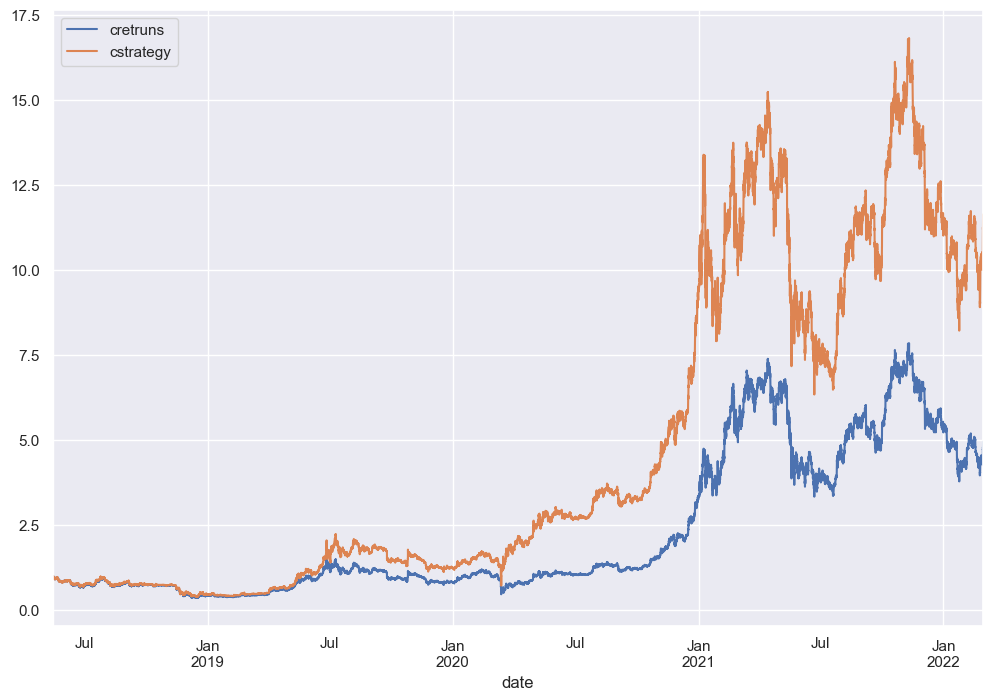

In [134]:
data[["cretruns", "cstrategy"]].plot(figsize=(12, 8))